In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/Fake_News_ShareTask/Task2/Preprocessed_datasets/processed_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Fake_News_ShareTask/Task2/Preprocessed_datasets/processed_test.csv')

In [7]:
text_column = 'News'
label_column = 'Label'

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = tfidf_vectorizer.fit_transform(train_df[text_column].astype(str))
X_test = tfidf_vectorizer.transform(test_df[text_column].astype(str))

In [9]:
y_train = train_df[label_column]

In [10]:
def evaluate_model(model, X, y, dataset_name="Dataset"):
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions, average='macro')
    rec = recall_score(y, predictions, average='macro')
    f1 = f1_score(y, predictions, average='macro')
    conf_matrix = confusion_matrix(y, predictions)

    print(f"\n{dataset_name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (Macro): {prec:.4f}")
    print(f"Recall (Macro): {rec:.4f}")
    print(f"F1-Score (Macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y, predictions))

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=model.classes_,
        yticklabels=model.classes_
    )
    plt.title(f"Confusion Matrix for {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1

In [11]:
print("Tuning SVM Classifier...")
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
svm_grid.fit(X_train, y_train)

Tuning SVM Classifier...


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1_macro')


Best Parameters for SVM Classifier: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Evaluating SVM Classifier on Training Data...

Training Evaluation:
Accuracy: 0.9937
Precision (Macro): 0.9903
Recall (Macro): 0.9828
F1-Score (Macro): 0.9864
Classification Report:
              precision    recall  f1-score   support

       FALSE       1.00      1.00      1.00      1220
  FALSE            0.97      0.98      0.98       166
   HALF TRUE       0.99      0.99      0.99       162
MOSTLY FALSE       1.00      0.99      0.99       295
PARTLY FALSE       1.00      0.95      0.97        57

    accuracy                           0.99      1900
   macro avg       0.99      0.98      0.99      1900
weighted avg       0.99      0.99      0.99      1900



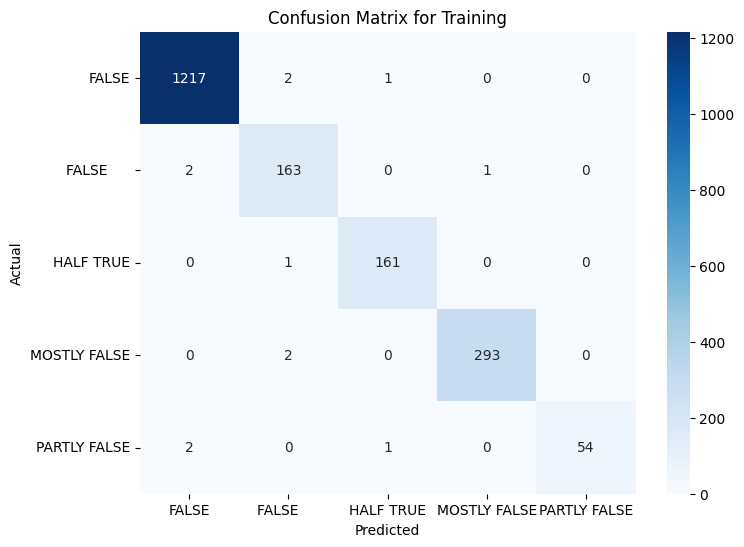

(0.9936842105263158, 0.9902581585535135, 0.982776922995888, 0.9863658104289055)

In [12]:
svm_best = svm_grid.best_estimator_

print("\nBest Parameters for SVM Classifier:", svm_grid.best_params_)

# Evaluate SVM Classifier on Training Data
print("\nEvaluating SVM Classifier on Training Data...")
evaluate_model(svm_best, X_train, y_train, "Training")

In [13]:
test_predictions = svm_best.predict(X_test)

In [14]:
test_df['Predicted_Label'] = test_predictions


output_df = test_df[['S.no', 'Predicted_Label']]

# Save to a CSV file
output_csv_path = '/content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_SVM.csv'
output_df.to_csv(output_csv_path, index=False, encoding='utf-8')
print(f"\nTest predictions saved to {output_csv_path}")


Test predictions saved to /content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_SVM.csv


In [15]:
from sklearn.linear_model import LogisticRegression

print("Tuning Logistic Regression Classifier...")
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
lr_grid.fit(X_train, y_train)

Tuning Logistic Regression Classifier...


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1_macro')


Best Parameters for Logistic Regression Classifier: {'C': 10, 'solver': 'lbfgs'}

Evaluating Logistic Regression Classifier on Training Data...

Training Evaluation:
Accuracy: 0.9926
Precision (Macro): 0.9909
Recall (Macro): 0.9832
F1-Score (Macro): 0.9870
Classification Report:
              precision    recall  f1-score   support

       FALSE       0.99      1.00      1.00      1220
  FALSE            0.98      0.98      0.98       166
   HALF TRUE       0.99      0.99      0.99       162
MOSTLY FALSE       1.00      0.98      0.99       295
PARTLY FALSE       1.00      0.96      0.98        57

    accuracy                           0.99      1900
   macro avg       0.99      0.98      0.99      1900
weighted avg       0.99      0.99      0.99      1900



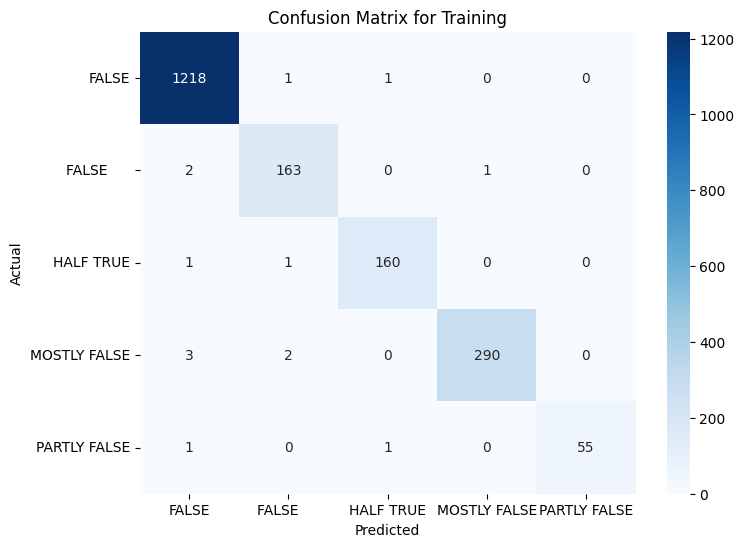

(0.9926315789473684,
 0.9909103026696293,
 0.9831811631456228,
 0.9869712535329137)

In [16]:
lr_best = lr_grid.best_estimator_
print("\nBest Parameters for Logistic Regression Classifier:", lr_grid.best_params_)

print("\nEvaluating Logistic Regression Classifier on Training Data...")
evaluate_model(lr_best, X_train, y_train, "Training")

In [17]:
test_predictions = lr_best.predict(X_test)
test_df['Predicted_Label'] = test_predictions

# Save predictions to CSV
output_csv_path = '/content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_LR.csv'
output_df = test_df[['S.no', 'Predicted_Label']]
output_df.to_csv(output_csv_path, index=False, encoding='utf-8')
print(f"\nTest predictions saved to {output_csv_path}")


Test predictions saved to /content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_LR.csv


In [19]:
from sklearn.naive_bayes import MultinomialNB

print("Tuning Multinomial Naive Bayes Classifier...")
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}
nb_grid = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
nb_grid.fit(X_train, y_train)

Tuning Multinomial Naive Bayes Classifier...


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
             scoring='f1_macro')


Best Parameters for Multinomial Naive Bayes Classifier: {'alpha': 0.1}

Evaluating Multinomial Naive Bayes Classifier on Training Data...

Training Evaluation:
Accuracy: 0.9068
Precision (Macro): 0.9335
Recall (Macro): 0.7715
F1-Score (Macro): 0.8348
Classification Report:
              precision    recall  f1-score   support

       FALSE       0.89      0.99      0.94      1220
  FALSE            0.88      0.81      0.85       166
   HALF TRUE       0.98      0.73      0.84       162
MOSTLY FALSE       0.98      0.80      0.88       295
PARTLY FALSE       0.94      0.53      0.67        57

    accuracy                           0.91      1900
   macro avg       0.93      0.77      0.83      1900
weighted avg       0.91      0.91      0.90      1900



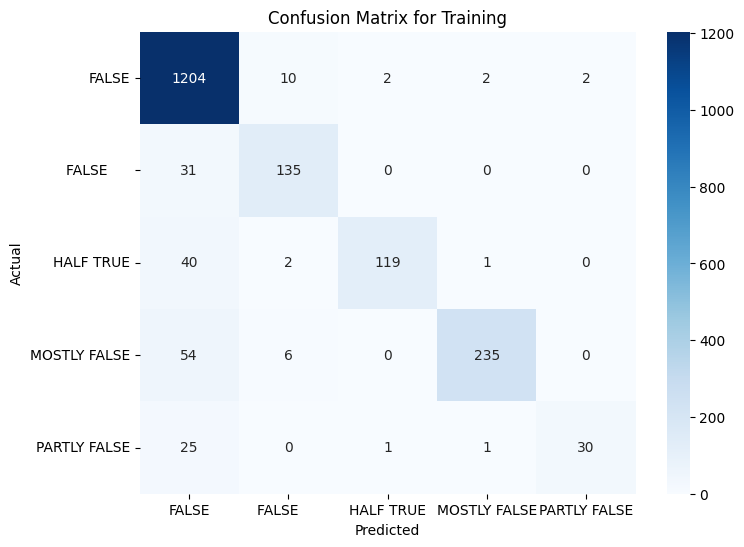

(0.9068421052631579, 0.9335487019969895, 0.771526423629922, 0.8348478409907816)

In [20]:
nb_best = nb_grid.best_estimator_
print("\nBest Parameters for Multinomial Naive Bayes Classifier:", nb_grid.best_params_)

print("\nEvaluating Multinomial Naive Bayes Classifier on Training Data...")
evaluate_model(nb_best, X_train, y_train, "Training")

In [21]:
test_predictions = nb_best.predict(X_test)
test_df['Predicted_Label'] = test_predictions

output_csv_path = '/content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_MultinomialNB.csv'
output_df = test_df[['S.no', 'Predicted_Label']]
output_df.to_csv(output_csv_path, index=False, encoding='utf-8')
print(f"\nTest predictions saved to {output_csv_path}")


Test predictions saved to /content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_MultinomialNB.csv


In [22]:
from sklearn.ensemble import RandomForestClassifier

print("Tuning Random Forest Classifier...")
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc_grid = GridSearchCV(RandomForestClassifier(random_state=42), rfc_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rfc_grid.fit(X_train, y_train)

Tuning Random Forest Classifier...


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')


Best Parameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Evaluating Random Forest Classifier on Training Data...

Training Evaluation:
Accuracy: 0.9953
Precision (Macro): 0.9915
Recall (Macro): 0.9889
F1-Score (Macro): 0.9902
Classification Report:
              precision    recall  f1-score   support

       FALSE       1.00      1.00      1.00      1220
  FALSE            0.99      0.98      0.98       166
   HALF TRUE       0.99      0.99      0.99       162
MOSTLY FALSE       1.00      0.99      0.99       295
PARTLY FALSE       0.98      0.98      0.98        57

    accuracy                           1.00      1900
   macro avg       0.99      0.99      0.99      1900
weighted avg       1.00      1.00      1.00      1900



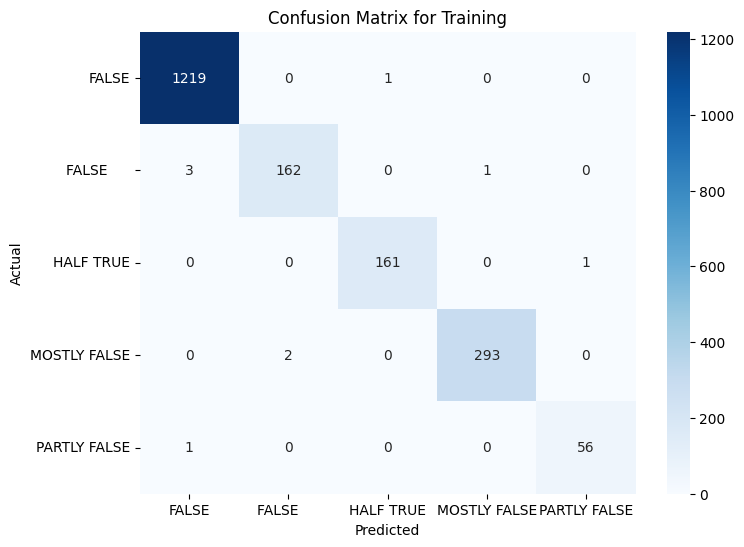

(0.9952631578947368, 0.9914832344793382, 0.9889175164308878, 0.990192288023459)

In [23]:
rfc_best = rfc_grid.best_estimator_
print("\nBest Parameters for Random Forest Classifier:", rfc_grid.best_params_)

# Evaluate Random Forest Classifier on Training Data
print("\nEvaluating Random Forest Classifier on Training Data...")
evaluate_model(rfc_best, X_train, y_train, "Training")

In [24]:
test_predictions = rfc_best.predict(X_test)
test_df['Predicted_Label'] = test_predictions

output_csv_path = '/content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_RandomForest.csv'
output_df = test_df[['S.no', 'Predicted_Label']]
output_df.to_csv(output_csv_path, index=False, encoding='utf-8')
print(f"\nTest predictions saved to {output_csv_path}")


Test predictions saved to /content/drive/MyDrive/Fake_News_ShareTask/Task2/Models/Fake_News_RandomForest.csv
